<div class="alert alert-block alert-info">
    <h1>SAS Programmers Week: Analyzing Data with Python in SAS Viya </h1>
    <p style="font-size:13pt"> 
        <b>Description:</b> This workshop will quickly introduce how to work with Python in SAS Viya. A basic understanding of Python is assumed.
            <br>
            <br>
        <b>Instructor:</b> Peter Styliadis
            <br>
            <br>
        <b>Date:</b> September 16th, 2021
            <br>
            <br>
        <b>Connect with me on <a href="https://www.linkedin.com/in/peter-styliadis-712bb357">LinkedIn!</a></b>
    </p>

## <a id='0'>Table of Contents </a>

- [Set Up Packages and Environment](#A)
1. [SAS Viya Overview](#1)
    >1. What is SAS Viya?
    >2. Cloud Analytic Services (CAS)
    >3. SAS Viya is Open
2. [Connect to the CAS Server in SAS Viya](#2)
    >1. How to Connect to CAS
3. [Create the Data for the Workshop](#3)
    >1. Use the createData Package
4. [Explore Available Data on the CAS Server](#4)
    >1. [View All Available Caslibs](#4a)
    >2. [View Available In-Memory Tables](#4b)
    >3. [View Available Data Source Files](#4c)
5. [Load Data into CAS Memory for Processing](#5)
    >1. [Load a Single Data Soucre File Into Memory](#5a)
    >2. [Use a Python Loop to Load Multiple Files](#5b)
6. [Preview the In-Memory CAS Tables](#6)
    >1. [Reference a CAS Table](#6a)
    >2. [Executing CAS Actions and Familiar Pandas Methods on a CAS Table](#6b)
        - head method
        - fetch CAS action
    >3. [View the CAS API in Action](#6c)
7. [Explore the CAS Table](#7)
    >1. [Obtain CAS Table Information](#7a)
        - shape, tableInfo, tableDetails
    >2. [View CAS Table Column Attributes](#7b)
        - dytpes, columnInfo
    >3. [View the Distinct Values in a CAS Table](#7c)
        - nunique, info, nmiss, distinct, plotting results of the distinct CAS action
8. [Summary Statistics on a CAS Table](#8)
    >1. [Describe SWAT Method](#8a)
    >2. [Summary Action](#8b)
    >3. [Doing More with the Summary Action](#8c)
9. [Doing More with Python in SAS Viya](#9) (Bonus Material)
    >1. [Return Frequency Values for Columns](#9a)
    >2. [Execute SQL Queries Using FedSQL](#9b)
    >3. [Summary Action with Group By](#9c)
    >4. [Execute the SAS DATA Step](#9d)
    >5. [Create a New CAS Table Using the CopyTable Action](#9e)
10. [Terminate the Connection to CAS](#10)
 

<br> </br>
### Documentation References:
Below is a consolidated list of documentation:

- To view all CAS action sets and actions visit the documentation: [SAS® Viya® Actions and Action Sets by Name and Product](https://go.documentation.sas.com/doc/en/pgmsascdc/v_006/allprodsactions/titlepage.htm?homeOnFail)
- For more information about Cloud Analytic Services, visit the documentation: [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/v_006/casfun/titlepage.htm?homeOnFail)
- To view the SWAT API Reference visit: [API Reference](https://sassoftware.github.io/python-swat/api.html)
- Visit the documentation [Getting Started with SAS® Viya® for Python](https://documentation.sas.com/doc/en/pgmsascdc/v_006/caspg3/titlepage.htm?homeOnFail) for more information about connecting to CAS.

### Blog Series
View my blog series on Python Integration to SAS Viya or CAS Action! - a series on fundamentals . I will continue to add to this series. I post new blogs on my LinkedIn feed.
- [Getting Started with Python Integration to SAS® Viya® - Index](https://blogs.sas.com/content/sgf/2020/06/19/getting-started-with-python-integration-to-sas-viya-index/)
- [CAS Action! - a series on fundamentals](https://blogs.sas.com/content/sgf/2021/08/06/cas-action-a-series-on-fundamentals/)

<div class="alert alert-info" role="alert">
    
<a id='A'>
    <h2> Set Up Packages and Environment </h2>
</a>
   
[Back to table of contents](#0)
    
</div>

In [1]:
################################
## Data packages              ##
################################

## The SWAT package is required to connect to the CAS server
import swat

## Custom package to create the data for the workshop. The createData.py file must reside in the same location as your notebook.
from createData import createProducts, createDiscountData

## my personal module to connect to CAS
from casConnect import connect_to_cas 

## Native Python packages below
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


################################
## Set notebook options       ##
################################

## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Expand settings to view all columns
pd.set_option("display.max_columns", None)

## Options to view the CAS API
swat.options.cas.trace_actions = False      # Enabling tracing of actions (Default is False. Will change to true later)
swat.options.cas.trace_ui_actions = False   # Display the actions behind “UI” methods (Default is False. Will change to true later)


################################
## Show Slides in Notebook    ##
################################
from IPython.display import Image
import os

## Function will output images from the images folder to show in an output cell
def slide(imgName, w=1000):
    display(Image(os.getcwd() + '\\images\\' + imgName, width = w) )

<div class="alert alert-info" role="alert">
    
<a id='1'>
    <h2> 1. SAS Viya Overview </h2>
</a>
   
[Back to table of contents](#0)
    
</div>

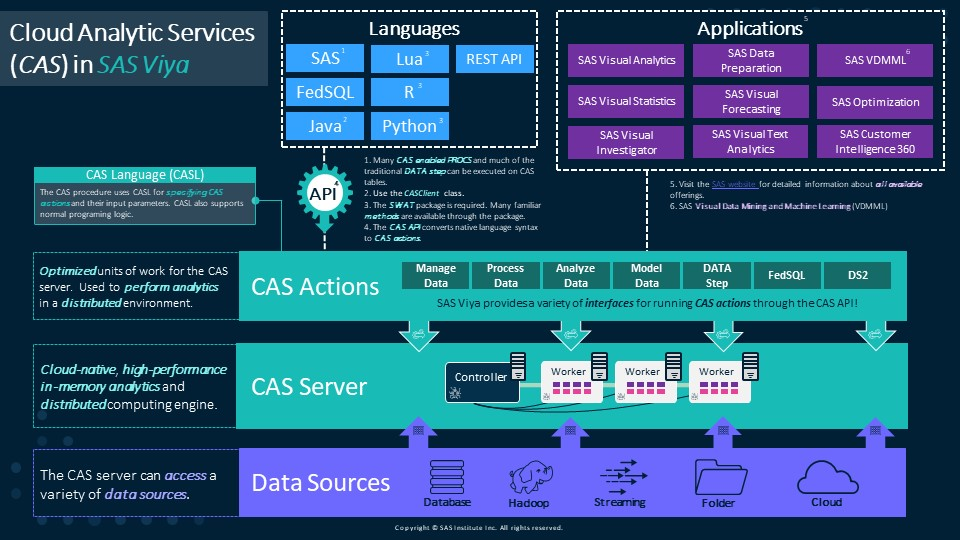

In [2]:
slide(r'\Python_Viya_Workshop_SAS_Programmers_Week.jpg')

### What is SAS Viya

SAS Viya extends the SAS Platform, operates in the cloud (as well as in hybrid and on-prem solutions) and is open source-friendly. For better performance while manipulating data and running analytical procedures, SAS Viya can run your code in Cloud Analytic Services (CAS). CAS operates on in-memory data, removing the read/write transfer overhead. Further, it enables everyone in an organization to collaborate and work with data by providing a variety of [products and solutions](https://www.sas.com/en_us/software/viya.html) running in CAS.

### Cloud Analytic Services (CAS)
SAS Viya processes data and performs analytics using *SAS Cloud Analytic Services*, or *CAS* for short. CAS provides a powerful distributed computing environment designed to store large data sets in memory for fast and efficient processing. It uses scalable, high-performance, multi-threaded algorithms to rapidly perform analytical processing on in-memory data of any size.

#### For more information about Cloud Analytic Services, visit the documentation: [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/v_006/casfun/titlepage.htm?homeOnFail)

<br>

### SAS Viya is Open


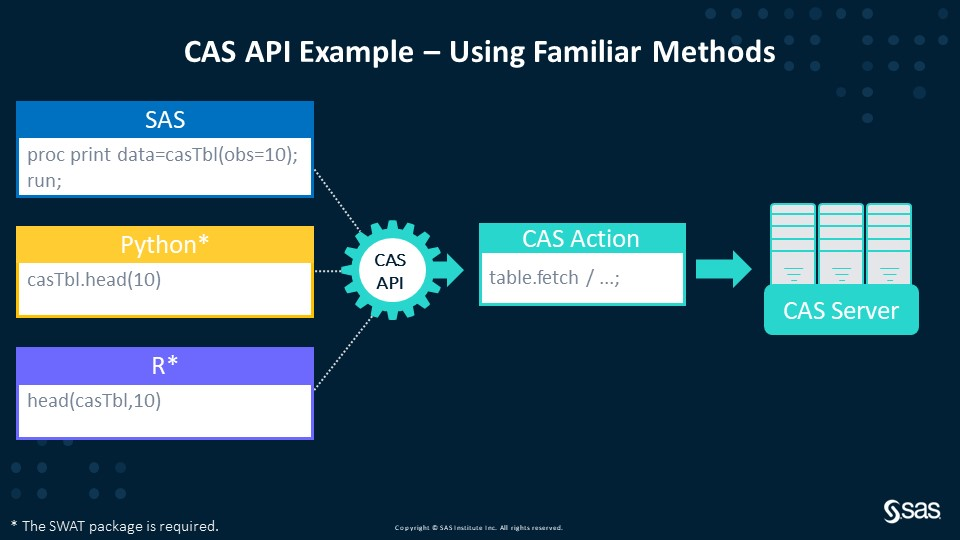

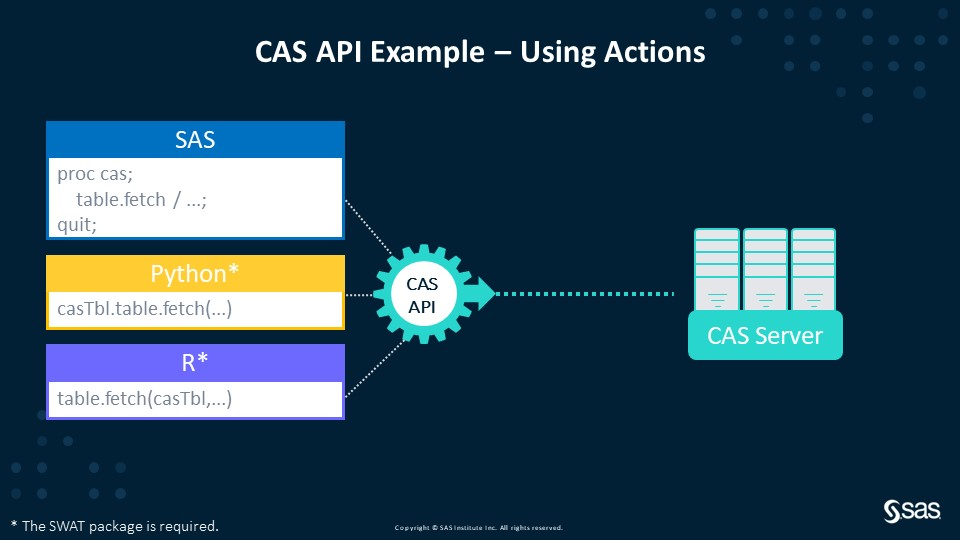

In [3]:
slide(r'\CASAPI_Methods.jpg', w=650)
slide(r'\CASAPI_Actions.jpg', w=650)

SAS Viya is open. Business analysts and data scientists can explore, prepare and manage data to provide insights, create visualizations or analytical models using the SAS programming language or a variety of open source languages like Python, R, Lua, or Java. Because of this, programmers can easily process data in CAS, using a language of their choice.

#### More resources for developers on SAS and open source, visit the [SAS Developer Home page](https://developer.sas.com/home.html)

<div class="alert alert-info" role="alert">
    
<a id='2'>
    <h2> 2. Connect to the CAS Server in SAS Viya </h2>
</a>
   
[Back to table of contents](#0)
    
</div>

##### To connect to the CAS server you will need:
1. the host name, 
2. the portnumber, 
3. your user name, and your password.

Visit the documentation [Getting Started with SAS® Viya® for Python](https://documentation.sas.com/doc/en/pgmsascdc/v_006/caspg3/titlepage.htm?homeOnFail) for more information about connecting to CAS.

**Be aware that connecting to the CAS server can be implemented in various ways, so you might need to see your system administrator about how to make a connection. Please follow company policy regarding authentication.**

In [4]:
## My personal connection to CAS. You will have your own.
conn = connect_to_cas() 

## General form: swat.CAS(host, port, username, password)

The conn object is our connection to the CAS server.

In [5]:
type(conn)

swat.cas.connection.CAS

In [6]:
print(conn)

CAS('ssemonthly.demo.sas.com', 443, protocol='https', name='py-session-1', session='ab8b4272-bcf1-fb4e-907c-b997f1c1ec9e')


<div class="alert alert-info" role="alert">
    
<a id='3'>
    <h2> 3. Create the Data for the Workshop (required) </h2>
</a>
   
[Back to table of contents](#0)
    
</div>

Using the functions from the **createData** package to create the data for the workshop. 

- **createProducts**(*connection name*, *number of rows per worker*) - Creates a fake product orders table. The function creates n number of rows PER thread. For example, if you specify the value 100 and have 16 threads, the function will create 1600 rows. Be careful when specifying n.
- **createDiscountData**(*connect name*) - Creates a fake discount code lookup table with 7 rows.

In [7]:
#############################################
## WARNING: PLEASE READ PRIOR TO EXECUTING ##
#############################################
## The function creates n number of rows per available threads. 
## In this example 8,000,000 x 16 = 128,000,000 rows. This takes about 3-5 minutes.
## Please modify the rowsPerThread variable prior to executing based on your environment

## Modify the number of rows to create per thread
rowsPerThread=100
createProducts(conn,rowsPerThread)

The PRODUCTS table has been created with 19,200 rows in the CASUSER caslib
NOTE: Cloud Analytic Services saved the file products.csv in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: Cloud Analytic Services dropped table products from caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: File products.csv created successfully with 19,200 rows.


In [8]:
## Creates the discount code lookup table
createDiscountData(conn)

The DISCOUNT_DIM table has been created with 7 rows in the CASUSER caslib
NOTE: Cloud Analytic Services saved the file discount_dim.sashdat in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: Cloud Analytic Services dropped table discount_dim from caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: File discount_dim.sashdat created successfully with 7 rows.


Confirm the **CSV** and **SASHDAT** files are available in the casuser caslib's data source by executing the [fileInfo](https://go.documentation.sas.com/doc/en/pgmsascdc/v_006/caspg/cas-table-fileinfo.htm) CAS action on the CAS server to view all available data sources files in the casuser caslib.

In [9]:
conn.fileInfo(caslib="casuser")

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,cars.sas7bdat,139264,,2022-08-16T21:25:39+00:00,1.976304e+09
1,-rwxr-xr-x,sas,sas,VTI.sashdat,413080,NONE,2022-10-11T13:40:38+00:00,1.981115e+09
2,-rwxr-xr-x,sas,sas,hmeq.sashdat,630384,NONE,2022-10-13T17:56:59+00:00,1.981303e+09
3,-rwxr-xr-x,sas,sas,tsa_claims_raw.csv,34936205,,2023-01-16T13:13:53+00:00,1.989494e+09
4,-rwxr-xr-x,sas,sas,warranty_claims.parquet,4096,NONE,2022-11-17T13:43:26+00:00,1.984312e+09
5,-rwxr-xr-x,sas,sas,HMEQ_SAS.parquet,4096,NONE,2022-11-17T13:46:56+00:00,1.984312e+09
6,-rwxr-xr-x,sas,sas,cars.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
7,-rwxr-xr-x,sas,sas,WARRANTY_CLAIMS.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
8,-rwxr-xr-x,sas,sas,classCopy.sashdat,20904,NONE,2022-12-21T16:59:03+00:00,1.987261e+09
9,-rwxr-xr-x,sas,sas,cars.sashdat,102936,NONE,2023-01-18T00:46:06+00:00,1.989622e+09


<div class="alert alert-info" role="alert">
    
<a id='4'>
    <h2> 4. Explore the Available Data on the CAS Server </h2>
</a>
   
[Back to table of contents](#0)
    
</div>

- The CAS server processes data via **CAS actions**.
- Think of **action sets** as a *package*, and all the **actions** inside an action set as *methods*.
- You can execute CAS actions using the SWAT API. 


**Documentation**:
- To view all CAS action sets and actions visit the documentation: [SAS® Viya® Actions and Action Sets by Name and Product](https://go.documentation.sas.com/doc/en/pgmsascdc/v_006/allprodsactions/titlepage.htm?homeOnFail)
- To view the SWAT API Reference visit: [API Reference](https://sassoftware.github.io/python-swat/api.html)


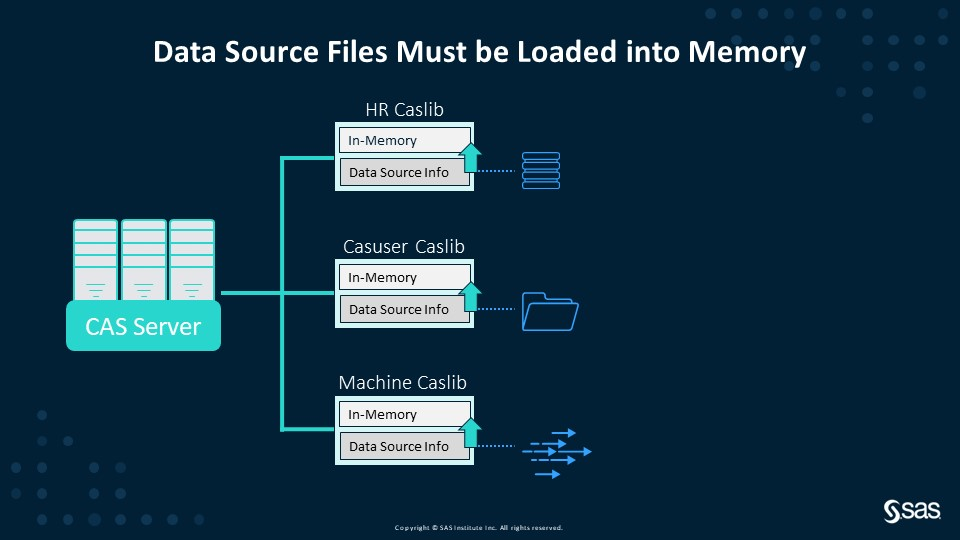

In [10]:
slide(r'\caslibs.jpg', w=750)

###  <a id='4a'> 4a. View All Available Caslibs </a>
The [caslibInfo](https://go.documentation.sas.com/doc/en/pgmsascdc/v_006/caspg/cas-table-caslibinfo.htm) CAS action shows all available caslibs.

[Back to table of contents](#0)

In [ ]:
conn.caslibInfo()

## You can specify the action set then action, or just specify the action. 
## If you just specify the action there are a few actions that have the same name.
## two level: action-set.action

#conn.table.caslibInfo()

###  <a id='4b'> 4b. View Available In-Memory Tables </a>
Use the [tableInfo](https://go.documentation.sas.com/doc/en/pgmsascdc/v_006/caspg/cas-table-tableinfo.htm) CAS action to view all available in-memory tables in a specific caslib. Here we will use the casuser caslib.

[Back to table of contents](#0)



In [12]:
conn.tableInfo(caslib="casuser")

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,CARS_UPDATE,428,16,0,utf-8,2023-01-18T00:51:39+00:00,2023-01-18T00:51:46+00:00,2023-01-18T00:51:46+00:00,UTF8,1.989622e+09,1.989622e+09,1.989622e+09,1,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN
1,DISCOUNTORDERS_COPYTABLE,3877,4,0,utf-8,2023-01-18T12:49:32+00:00,2023-01-18T12:49:32+00:00,2023-01-18T12:49:32+00:00,UTF8,1.989665e+09,1.989665e+09,1.989665e+09,1,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN


<div class="alert alert-block alert-success">
    <b>SUMMARY: </b>Notice the necessary tables <b>products</b> and <b>discountCodes</b> are not currently available in-memory in the casuser caslib. When working with data in CAS:
    <li>Data must be loaded into CAS memory to be processed. As of now we have not done that yet. Currently the data is saved as a CSV and SASHDAT file in the data source portion of the casuser caslib..</li>
    <li>When working with caslibs, the casuser caslib is only available to the specific user. You must save to other caslibs to share files with other users.</li>
    <li>Lastly, to share a CAS table with other users and applications you must promote the table to global scope. Visit <a href="https://documentation.sas.com/doc/en/pgmsascdc/v_015/casfun/n09ssmi0ko8uyfn1022ezo2hv0pm.htm#p0mbflp8ta6iq3n1aswoae5s5g76">Session and Global Scope</a> for more information.
</div>

###  <a id='4c'> 4c. View Available Data Source Files </a>
Use the [fileInfo](https://go.documentation.sas.com/doc/en/pgmsascdc/v_015/caspg/cas-table-fileinfo.htm) action to view all the data source files that are available.

[Back to table of contents](#0)

In [13]:
conn.fileInfo(caslib="casuser")

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,cars.sas7bdat,139264,,2022-08-16T21:25:39+00:00,1.976304e+09
1,-rwxr-xr-x,sas,sas,VTI.sashdat,413080,NONE,2022-10-11T13:40:38+00:00,1.981115e+09
2,-rwxr-xr-x,sas,sas,hmeq.sashdat,630384,NONE,2022-10-13T17:56:59+00:00,1.981303e+09
3,-rwxr-xr-x,sas,sas,tsa_claims_raw.csv,34936205,,2023-01-16T13:13:53+00:00,1.989494e+09
4,-rwxr-xr-x,sas,sas,warranty_claims.parquet,4096,NONE,2022-11-17T13:43:26+00:00,1.984312e+09
5,-rwxr-xr-x,sas,sas,HMEQ_SAS.parquet,4096,NONE,2022-11-17T13:46:56+00:00,1.984312e+09
6,-rwxr-xr-x,sas,sas,cars.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
7,-rwxr-xr-x,sas,sas,WARRANTY_CLAIMS.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
8,-rwxr-xr-x,sas,sas,classCopy.sashdat,20904,NONE,2022-12-21T16:59:03+00:00,1.987261e+09
9,-rwxr-xr-x,sas,sas,cars.sashdat,102936,NONE,2023-01-18T00:46:06+00:00,1.989622e+09


<div class="alert alert-info" role="alert">
    
<a id='5'>
    <h2> 5. Load Data into CAS Memory for Processing </h2>
</a>
   
[Back to table of contents](#0)
    
</div>


There are two methods that can be used to load **server-side** data into CAS. Server-side files are files that are located in a caslib and available to the CAS server:
- [loadtable](https://go.documentation.sas.com/doc/en/pgmsascdc/v_006/caspg/cas-table-loadtable.htm) - (*CAS Action*) Loads a table into CAS and returns a information about the loaded table.
- [load_path](https://sassoftware.github.io/python-swat/generated/swat.cas.connection.CAS.load_path.html#swat.CAS.load_path) - (*Convenience method*) Similar to **loadtable**.  **load_path** executes the loadTable action behind the scenes and returns a reference to that CAS table in one step. 

You can modify which rows and columns you wan to load into memory using a variety of parameters. See the documentation for more information or use the help function and the action/method.


In [ ]:
help(conn.loadTable)

###  <a id='5a'> 5a. Load a Single Data Soucre File Into Memory </a>
Here i'll use the **loadTable** CAS action since it works similarly in all available languages through the CAS API.

[Back to table of contents](#0)

In [15]:
conn.fileInfo(caslib='casuser')

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,cars.sas7bdat,139264,,2022-08-16T21:25:39+00:00,1.976304e+09
1,-rwxr-xr-x,sas,sas,VTI.sashdat,413080,NONE,2022-10-11T13:40:38+00:00,1.981115e+09
2,-rwxr-xr-x,sas,sas,hmeq.sashdat,630384,NONE,2022-10-13T17:56:59+00:00,1.981303e+09
3,-rwxr-xr-x,sas,sas,tsa_claims_raw.csv,34936205,,2023-01-16T13:13:53+00:00,1.989494e+09
4,-rwxr-xr-x,sas,sas,warranty_claims.parquet,4096,NONE,2022-11-17T13:43:26+00:00,1.984312e+09
5,-rwxr-xr-x,sas,sas,HMEQ_SAS.parquet,4096,NONE,2022-11-17T13:46:56+00:00,1.984312e+09
6,-rwxr-xr-x,sas,sas,cars.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
7,-rwxr-xr-x,sas,sas,WARRANTY_CLAIMS.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
8,-rwxr-xr-x,sas,sas,classCopy.sashdat,20904,NONE,2022-12-21T16:59:03+00:00,1.987261e+09
9,-rwxr-xr-x,sas,sas,cars.sashdat,102936,NONE,2023-01-18T00:46:06+00:00,1.989622e+09


Load the **products.csv** file into memory. The CSV file contains 128 million rows.

In [16]:
conn.loadtable(path="products.csv", caslib="casuser",    ## Data source file to load into memory
               casOut={"name":"products",                ## New in-memory CAS table information
                       "caslib":"casuser", 
                       "replace":True}
               )

NOTE: Cloud Analytic Services made the file products.csv available as table PRODUCTS in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'PRODUCTS'

[casTable]

 CASTable('PRODUCTS', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 0.0581s, user: 0.0422s, sys: 0.157s, mem: 395mb

###  <a id='5b'> 5b. Use a Python Loop to Load Multiple Files </a>
[Back to table of contents](#0)

You can also use general Python syntax to write a loop to load multiple tables into memory. Here I'll load both the **products.csv** and **DiscountCodes.sashdat** data source files into memory using a traditional Python loop if that table is not already in-memory.

- In the loop you can use the [tableExists](https://go.documentation.sas.com/doc/en/pgmsascdc/v_006/caspg/cas-table-tableexists.htm) action to check if a table is aleady loaded into memory.

- If you do not specify the name key in the casOut parameter CAS will use the file name as the in-memory table name.

In [17]:
## List the tables to load into memory
tables=['products.csv', 'discount_dim.sashdat']

## Loop over the above list and load the tables in memory if they are not already available
for i in tables:
    tblName=i.split(".")[0]                                                ## Store the name of the table
    if conn.tableExists(name=tblName, caslib="casuser")['exists']==0:      ## Check to see if the table exists in-memory
        conn.loadtable(path=i, caslib="casuser",                           ## If it's not in-memory, load the table
                      casOut={"caslib":"casuser", 
                              "replace":True})  
    else:
        print(f"The {tblName} table is already loaded into memory")        ## If it's already in-memory add a note

The products table is already loaded into memory
NOTE: Cloud Analytic Services made the file discount_dim.sashdat available as table DISCOUNT_DIM in caslib CASUSER(Peter.Styliadis@sas.com).


Confirm the tables were successfully loaded into memory by viewing available in-memory tables in the casuser caslib.

In [18]:
conn.tableInfo(caslib="casuser")

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,PRODUCTS,19200,7,0,utf-8,2023-01-18T12:49:54+00:00,2023-01-18T12:49:54+00:00,2023-01-18T12:49:54+00:00,UTF8,1.989665e+09,1.989665e+09,1.989665e+09,0,0,0,0,products.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-18T12:49:50+00:00,1.989665e+09
1,DISCOUNT_DIM,7,3,0,utf-8,2023-01-18T12:49:55+00:00,2023-01-18T12:49:55+00:00,2023-01-18T12:49:55+00:00,UTF8,1.989665e+09,1.989665e+09,1.989665e+09,0,0,0,0,discount_dim.sashdat,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-18T12:49:51+00:00,1.989665e+09
2,CARS_UPDATE,428,16,0,utf-8,2023-01-18T00:51:39+00:00,2023-01-18T00:51:46+00:00,2023-01-18T00:51:46+00:00,UTF8,1.989622e+09,1.989622e+09,1.989622e+09,1,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN
3,DISCOUNTORDERS_COPYTABLE,3877,4,0,utf-8,2023-01-18T12:49:32+00:00,2023-01-18T12:49:32+00:00,2023-01-18T12:49:32+00:00,UTF8,1.989665e+09,1.989665e+09,1.989665e+09,1,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN


<div class="alert alert-info" role="alert">
    
<a id='6'>
    <h2> 6. Preview the In-Memory CAS Tables </h2>
</a>
   
[Back to table of contents](#0)
    
</div>

###  <a id='6a'> 6a. Reference a CAS Table </a>
[Back to table of contents](#0)

First you can reference the CAS table. When referencing the CAS table you should always specify the caslib. Otherwise the method/action will use the active caslib. The active caslib can vary. It's best to be explicit.

To reference the CAS table use the **CASTable** method.

In [19]:
prdCAS = conn.CASTable("products", caslib="casuser")

View the **prdCAS** object. Notice it references the **products** table in the **casuser** caslib. Notice it's a reference to the CAS table only.

In [20]:
prdCAS

CASTable('products', caslib='casuser')

View the object type.

In [21]:
type(prdCAS)

swat.cas.table.CASTable

<div class="alert alert-block alert-success">
    <b>NOTE: </b>Notice the object is a <b>CASTable</b> object. A <b>CASTable</b> object references a distributed in-memory table in the CAS Server.. 
</div>

###  <a id='6b'> 6b. Executing CAS Actions and Familiar Pandas Methods on a CAS Table </a>
[Back to table of contents](#0)

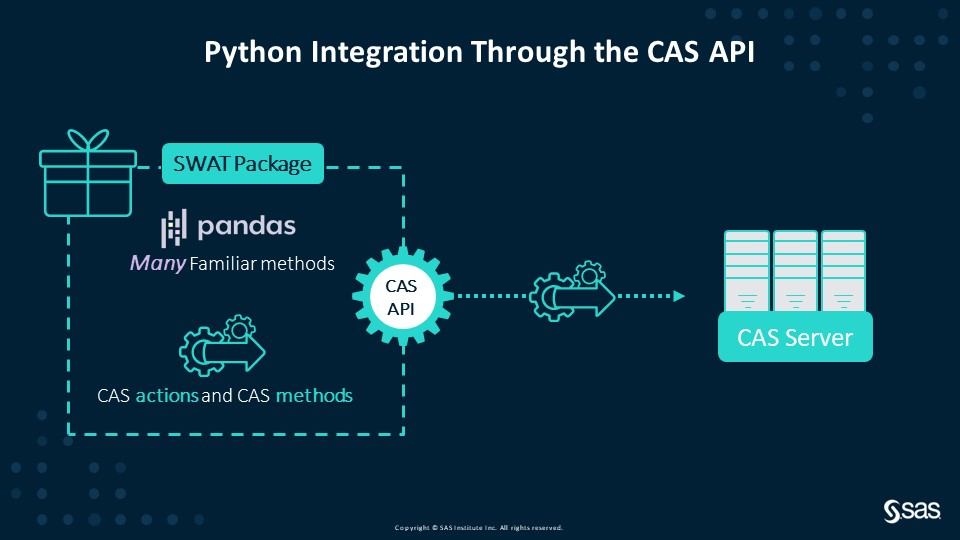

In [22]:
slide(r'\CASAPI.jpg', w=750)


Once you reference a **CASTable**, you can begin processing the table. When processing **CAS tables**:
- You can execute **CAS actions** directly, or using many of the familiar Pandas methods using the SWAT package. The SWAT package converts the Pandas methods to CAS actions behind the scenes through the CAS API.
- The SWAT package contains *most* of the methods defined by **Pandas DataFrames** for CAS tables. Not all are currently available.
- **CAS actions** are sent directly to the CAS server for processing. A benefit of using CAS actions is they can be used similarly from a variety of languages. This allows users from different programming backgrounds to use consistent actions and work together. 
- **CAS actions** also typically process a bit faster than using the familiar Pandas methods through the CAS API.
- Lastly, the **CAS server can process much larger data than your client machine!** You do not want to bring an entire  large CAS table back to your local client.


<div class="alert alert-block alert-success">
    <b>NOTE: </b>You can preview the table using both <b>head method </b> and the <b>fetch CAS action</b>. Both can produce similar results. However, there are some differences. Depending which method you use, the object returned will differ. 
    <b>All results are returned as a local object on your client machine</b>. 
</div>

#### head method

In [23]:
prdCAS

CASTable('products', caslib='casuser')

In [24]:
prdCAS.head()

,Product,DiscountCode,Return,StoreID,Price,Cost,Quantity
0,Shirts,,,19.0,7.99,1.99,8.0
1,Sweatshirt,,,17.0,10.99,1.99,6.0
2,Shirts,,,20.0,7.99,1.99,9.0
3,Shirts,TENOFF,,15.0,7.99,1.99,8.0
4,Sweatshirt,,,12.0,10.99,1.99,8.0


Using the familliar Pandas methods from the SWAT package can return a **variety of objects**. In this example the head method returns a SASDataFrame.

In [25]:
type(prdCAS.head())

swat.dataframe.SASDataFrame

<br></br>
<div class="alert alert-block alert-success">
    <b>SUMMARY: What is a SASDataFrame object?</b>
    <li>A SASDataFrame object contains <b>local client data</b>.</li>
    <li>A SASDataFrame object is a subclass of a <b>Pandas DataFrame</b>. You can work with them as you normally would a Pandas DataFrame.</li>
    <li>Using familiar Pandas methods from the SWAT API will typically return either <b>CASTable, CASColumn, pandas.DataFrame, or pandas.Series object</b>.
</div>

#### fetch CAS action
There are multiple ways to use a CAS action.

In [26]:
prdCAS.fetch(to=5)

## Specify the CAS table object inside the action
#conn.fetch(prdCAS, to=5)

## Explicitly type in the CAS table inside the action
#conn.fetch(table={"name":"products", "caslib":"casuser"},to=5)

,Product,DiscountCode,Return,StoreID,Price,Cost,Quantity
0,Shirts,,,19.0,7.99,1.99,8.0
1,Sweatshirt,,,17.0,10.99,1.99,6.0
2,Shirts,,,20.0,7.99,1.99,9.0
3,Shirts,TENOFF,,15.0,7.99,1.99,8.0
4,Sweatshirt,,,12.0,10.99,1.99,8.0


CAS actions return a **CASResults** object.

In [27]:
type(prdCAS.fetch(to=5))

swat.cas.results.CASResults

<div class="alert alert-block alert-success">
    <b>SUMMARY: What is a CASResults object?</b>
    <li>CAS actions return a <b>CASResults object</b>.</li> 
    <li>A <b>CASResults</b> object is simply an ordered <b>Python dictionary</b> with a few extra methods and attributes added.</li>
    <li>The <b>CASResults</b> object can contain <b>any number of keys and objects</b>.</li>
    <li>A <b>CASResults</b> object is <b>local on the client</b>.</li>
</div>

In [28]:
## Store the CASResults object in a variable
x = prdCAS.fetch(to=5)

In [29]:
## View the keys in the CASResults object
x.keys()

odict_keys(['Fetch'])

In [30]:
## Obtain the object
## Reference the key to return the object
x["Fetch"]

,Product,DiscountCode,Return,StoreID,Price,Cost,Quantity
0,Shirts,,,19.0,7.99,1.99,8.0
1,Sweatshirt,,,17.0,10.99,1.99,6.0
2,Shirts,,,20.0,7.99,1.99,9.0
3,Shirts,TENOFF,,15.0,7.99,1.99,8.0
4,Sweatshirt,,,12.0,10.99,1.99,8.0


In [31]:
## What does the Fetch key hold?
type(x["Fetch"])

swat.dataframe.SASDataFrame

<div class="alert alert-block alert-success">
    <b>SUMMARY:</b> 
    <li>CAS Actions return a CASResults object (dictionary). You can access the DataFrames held by the CASResults object as you would a typical dictionary.</li>
    <li>Once you have a SASDataFrame work with it as you would a pandas DataFrame.</li>
    <li>CASResults objects and SASDataFrames are LOCAL on your client. The action processed the data in the CAS server, summarized the data using all the workers, then returned the summarized results. </li>

<b>NOTE: Be careful on what you return to your client since CAS can handle more data than your client machine.</b>

</div>

###  <a id='6c'> 6c. View the CAS API in Action </a>
[Back to table of contents](#0)

Turn on the trace options to view the actions that are sent through the CAS API. [SWAT Option Documentation](https://go.documentation.sas.com/doc/en/pgmsascdc/v_016/caspg3r/p18d4d2a5f6cvqn18jcl8cxyn1un.htm)

In [32]:
swat.options.cas.trace_actions = True
swat.options.cas.trace_ui_actions = True

**head method**

Notice the head method is converted to the fetch action behind the scenes through the CAS API.

In [33]:
prdCAS.head()

[table.fetch]
    _apptag = 'UI'
    _messagelevel = 'error'
    from = 1
    index = True
    sastypes = False
    table.caslib = 'casuser'
    table.name = 'products'
    to = 5



,Product,DiscountCode,Return,StoreID,Price,Cost,Quantity
0,Shirts,,,19.0,7.99,1.99,8.0
1,Sweatshirt,,,17.0,10.99,1.99,6.0
2,Shirts,,,20.0,7.99,1.99,9.0
3,Shirts,TENOFF,,15.0,7.99,1.99,8.0
4,Sweatshirt,,,12.0,10.99,1.99,8.0


**Fetch action**

Notice the fetch action is sent to the CAS server.

In [34]:
prdCAS.fetch(to=5)

[table.fetch]
    sastypes = False
    table.caslib = 'casuser'
    table.name = 'products'
    to = 5



,Product,DiscountCode,Return,StoreID,Price,Cost,Quantity
0,Shirts,,,19.0,7.99,1.99,8.0
1,Sweatshirt,,,17.0,10.99,1.99,6.0
2,Shirts,,,20.0,7.99,1.99,9.0
3,Shirts,TENOFF,,15.0,7.99,1.99,8.0
4,Sweatshirt,,,12.0,10.99,1.99,8.0


Turn off the notes from the CAS API

In [35]:
swat.options.cas.trace_actions = False
swat.options.cas.trace_ui_actions = False

**Documentation**:
- To view all CAS action sets and actions visit the documentation: [SAS® Viya® Actions and Action Sets by Name and Product](https://go.documentation.sas.com/doc/en/pgmsascdc/v_015/allprodsactions/titlepage.htm)
- To view the SWAT API Reference visit: [API Reference](https://sassoftware.github.io/python-swat/api.html)

<div class="alert alert-info" role="alert">
    
<a id='7'>
    <h2> 7. Explore the CAS Table </h2>
</a>
Use a variety of SWAT methods and actions to explore a CAS table.
   
[Back to table of contents](#0)

</div>



First, let's again confirm our tables are available in-memory.

In [36]:
conn.tableInfo(caslib="casuser")

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,PRODUCTS,19200,7,0,utf-8,2023-01-18T12:49:54+00:00,2023-01-18T12:49:54+00:00,2023-01-18T12:50:02+00:00,UTF8,1.989665e+09,1.989665e+09,1.989665e+09,0,0,0,0,products.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-18T12:49:50+00:00,1.989665e+09
1,DISCOUNT_DIM,7,3,0,utf-8,2023-01-18T12:49:55+00:00,2023-01-18T12:49:55+00:00,2023-01-18T12:49:55+00:00,UTF8,1.989665e+09,1.989665e+09,1.989665e+09,0,0,0,0,discount_dim.sashdat,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-18T12:49:51+00:00,1.989665e+09
2,CARS_UPDATE,428,16,0,utf-8,2023-01-18T00:51:39+00:00,2023-01-18T00:51:46+00:00,2023-01-18T00:51:46+00:00,UTF8,1.989622e+09,1.989622e+09,1.989622e+09,1,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN
3,DISCOUNTORDERS_COPYTABLE,3877,4,0,utf-8,2023-01-18T12:49:32+00:00,2023-01-18T12:49:32+00:00,2023-01-18T12:49:32+00:00,UTF8,1.989665e+09,1.989665e+09,1.989665e+09,1,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN


Again, let's reference the CAS table as **prdCAS**. Review from above.

In [37]:
prdCAS = conn.CASTable("products", caslib="casuser")
prdCAS

CASTable('products', caslib='casuser')

###  <a id='7a'> 7a. Obtain CAS Table Information </a>
[Back to table of contents](#0)

Use the **shape** attribute.

In [38]:
prdCAS.shape

(19200, 7)

In [39]:
type(prdCAS.shape)

tuple

Create a Python function to output the total number of rows and columns of a CAS table.

In [40]:
def totalRows(casTable):
    x=casTable.shape
    print("Total Rows: {:,}".format(x[0]))
    print("Total Columns: {:,}".format(x[1]))

totalRows(prdCAS)

Total Rows: 19,200
Total Columns: 7


**CAS actions**:
- [tableDetails](https://go.documentation.sas.com/doc/en/pgmsascdc/v_015/caspg/cas-table-tabledetails.htm): Get detailed information about a table.
- [tableInfo](https://go.documentation.sas.com/doc/en/pgmsascdc/v_015/caspg/cas-table-tableinfo.htm): Shows information about a table.

In [41]:
prdCAS.tableDetails()

,Node,Blocks,Active,Rows,IndexSize,DataSize,VardataSize,CompressedSize,CompressionRatio,Mapped,MappedMemory,Unmapped,UnmappedMemory,Allocated,AllocatedMemory,DeletedRows,TableLocation
0,ALL,8,4,19200,0,1678212,142212,0,0,4,1678928,4,1678928,0,0,0,CAS


In [42]:
type(prdCAS.tableDetails())

swat.cas.results.CASResults

In [43]:
prdCAS.tableInfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,PRODUCTS,19200,7,0,utf-8,2023-01-18T12:49:54+00:00,2023-01-18T12:49:54+00:00,2023-01-18T12:50:08+00:00,UTF8,1.989665e+09,1.989665e+09,1.989665e+09,0,0,0,0,products.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-18T12:49:50+00:00,1.989665e+09


In [44]:
type(prdCAS.tableInfo())

swat.cas.results.CASResults

Work with a **CASResults** object using traditional Pandas on the client machine.

Specify the *TableInfo* key to return the **SASDataFrame**. Then use the **SASDataFrame** as you would a Python DataFrame. Remember, **SASDataFrames** are local on your client machine and a subclass of a Pandas DataFrame.

In [45]:
# Specify the columns to return from the SASDataFrame
cols=["Name","Rows","Columns"]

# Execute the CAS action and return the SASDataFrame with the specified columns. Set the name column as the index using Pandas
prdCAS.tableInfo()["TableInfo"][cols].set_index('Name')

,Rows,Columns
Name,,
PRODUCTS,19200,7


###  <a id='7b'> 7b. View CAS Table Column Attributes </a>
[Back to table of contents](#0)

Use the **dtypes** attribute to view column names and data types of a CAS table.

In [46]:
prdCAS.dtypes

Product         varchar
DiscountCode    varchar
Return          varchar
StoreID          double
Price            double
Cost             double
Quantity         double
dtype: object

You can also use the **columnInfo** CAS action for additional information.

In [47]:
prdCAS.columnInfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,Product,,1,varchar,10,10,,0,0
1,DiscountCode,,2,varchar,10,10,,0,0
2,Return,,3,varchar,3,3,,0,0
3,StoreID,,4,double,8,12,,0,0
4,Price,,5,double,8,12,,0,0
5,Cost,,6,double,8,12,,0,0
6,Quantity,,7,double,8,12,,0,0


###  <a id='7c'> 7c. View the Distinct Values in a CAS Table </a>
[Back to table of contents](#0)

Use the **nunique** method from the SWAT API inside a Python loop.

In [48]:
colNames=prdCAS.columns.tolist()
for i in colNames:
    print(i + ": " + str(prdCAS[i].nunique()))

Product: 4
DiscountCode: 7
Return: 1
StoreID: 51
Price: 4
Cost: 3
Quantity: 10


In [49]:
prdCAS.info()

CASTable('products', caslib='casuser')
Data columns (total 7 columns):
                  N   Miss     Type
Product       19200  False  varchar
DiscountCode   3877   True  varchar
Return          994   True  varchar
StoreID       19200  False   double
Price         19200  False   double
Cost          19200  False   double
Quantity      19200  False   double
dtypes: double(4), varchar(3)
data size: 1678212
vardata size: 142212
memory usage: 0


In [50]:
prdCAS.nmiss()

Product             0
DiscountCode    15323
Return          18206
StoreID             0
Price               0
Cost                0
Quantity            0
dtype: int64

Use the [distinct](https://go.documentation.sas.com/doc/en/pgmsascdc/v_015/casanpg/cas-simple-distinct.htm) CAS action

In [51]:
## Stores the result of the distinct action in d. Action summarizes the data in CAS and returns the results local on the client
d = prdCAS.distinct()
d

,Column,NDistinct,NMiss,Trunc
0,Product,4.0,0.0,0.0
1,DiscountCode,8.0,15323.0,0.0
2,Return,2.0,18206.0,0.0
3,StoreID,51.0,0.0,0.0
4,Price,4.0,0.0,0.0
5,Cost,3.0,0.0,0.0
6,Quantity,10.0,0.0,0.0


The distinct action has one key.

In [52]:
d.keys()

odict_keys(['Distinct'])

Store the SASDataFrame from the distinct action.

In [53]:
nmiss = d["Distinct"]
type(nmiss)

swat.dataframe.SASDataFrame

Plot the number of misisng values from the SASDataFrame above on the client using traditional Pandas.

<AxesSubplot:xlabel='Column'>

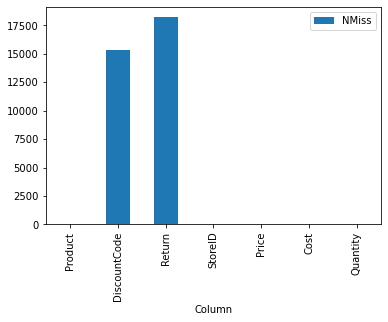

In [54]:
nmiss.plot(kind="bar", x="Column", y="NMiss")

<div class="alert alert-info" role="alert">
    
<a id='8'>
    <h2> 8. Summary Statistics on a CAS Table</h2>
</a>
   
[Back to table of contents](#0)
    
</div>

###  <a id='8a'> 8a. Describe SWAT Method </a>
[Back to table of contents](#0)

In [55]:
prdCAS.describe()

,StoreID,Price,Cost,Quantity
count,19200.000000,19200.000000,19200.000000,19200.000000
mean,19.483594,8.583542,1.740677,7.491302
std,6.341288,1.623503,0.335573,1.373796
min,3.000000,4.990000,0.990000,1.000000
25%,15.000000,7.990000,1.490000,7.000000
50%,19.000000,7.990000,1.990000,8.000000
75%,23.000000,8.990000,1.990000,8.000000
max,58.000000,10.990000,1.990000,10.000000


###  <a id='8b'> 8b. Summary Action</a>
[**summary**](https://go.documentation.sas.com/doc/en/pgmsascdc/v_015/casanpg/cas-simple-summary.htm) CAS action

[Back to table of contents](#0)

In [56]:
prdCAS.summary()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT,Skewness,Kurtosis
0,StoreID,3.00,58.00,19200.0,0.0,19.483594,374085.0,6.341288,0.045764,40.211929,8060549.00,772028.832031,32.546807,425.737813,0.0,0.636911,0.611503
1,Price,4.99,10.99,19200.0,0.0,8.583542,164804.0,1.623503,0.011717,2.635762,1465206.00,50603.999167,18.914140,732.595115,0.0,-0.454860,0.373418
2,Cost,0.99,1.99,19200.0,0.0,1.740677,33421.0,0.335573,0.002422,0.112610,60337.16,2161.991198,19.278332,718.755481,0.0,-0.999514,-0.213903
3,Quantity,1.00,10.00,19200.0,0.0,7.491302,143833.0,1.373796,0.009915,1.887314,1113731.00,36234.547448,18.338542,755.589315,0.0,-0.378558,-0.039785


<div class="alert alert-block alert-success">
    <b>INTERESTING:</b> 
View the processing time between using the SWAT describe method and summary action. If you turn on tracing options you will see describe uses multiple actions to mimic the pandas describe method. This most likely causes the longer processing time.

</div>

###  <a id='8c'> 8c. Doing More with the Summary Action</a>
[Back to table of contents](#0)

Specificy the columns to analyze using the **inputs** parameter.

In [57]:
prdCAS.summary(inputs=["Price","Cost","Quantity"])

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT,Skewness,Kurtosis
0,Price,4.99,10.99,19200.0,0.0,8.583542,164804.0,1.623503,0.011717,2.635762,1465206.00,50603.999167,18.914140,732.595115,0.0,-0.454860,0.373418
1,Cost,0.99,1.99,19200.0,0.0,1.740677,33421.0,0.335573,0.002422,0.112610,60337.16,2161.991198,19.278332,718.755481,0.0,-0.999514,-0.213903
2,Quantity,1.00,10.00,19200.0,0.0,7.491302,143833.0,1.373796,0.009915,1.887314,1113731.00,36234.547448,18.338542,755.589315,0.0,-0.378558,-0.039785


### There are multiple ways to use the CAS actions. Shown below are two methods.

Our Goal: Perform the summary action with the following
- Filter rows for *Pants* (where=)
- Create the calculated column **Total** by multiplying **Quantity * Price** (computedVarsProgram=)
- Select the **Quantity**, **Price** and **Total** columns (vars=)
- Select the MEAN, MAX and MIN summary statistics (subSet=)

**Method 1** - Here all of this will be done by specifying the table parameter and all of the sub parameters as a dictionary inside the action.

In [58]:
conn.summary(table={'name'  :'products',
                    'caslib':'casuser',
                    'where' :'Product="Pants"',
                    'vars'  : ['Quantity','Price','Total'],
                    'computedVarsProgram':'Total=Quantity * Price;'},
             subSet=['MEAN','MAX','MIN']
    )

,Column,Min,Max,Mean
0,Quantity,1.00,10.00,7.490045
1,Price,8.99,8.99,8.990000
2,Total,8.99,89.90,67.335508


**Method 2** - Adding parameters to the CAS table object to accomplish the same task. Doing it this way allows you to use the prdCAS object in other actions as well.

In [59]:
prdCAS

CASTable('products', caslib='casuser')

In [60]:
prdCAS.where = 'Product="Pants"'
prdCAS.vars = ['Quantity','Price','Total']
prdCAS.computedVarsProgram = 'Total=Quantity * Price;'

In [61]:
prdCAS

CASTable('products', caslib='casuser', computedvarsprogram='Total=Quantity * Price;', vars=['Quantity', 'Price', 'Total'], where='Product="Pants"')

In [62]:
prdCAS.summary(subSet=['MEAN','MAX','MIN'])

,Column,Min,Max,Mean
0,Quantity,1.00,10.00,7.490045
1,Price,8.99,8.99,8.990000
2,Total,8.99,89.90,67.335508


Now I can use the prdCAS object with the given parameters with other actions or methods.

For example, I can use the SWAT head method on the prdCAS CAS table reference. Head will return only the specified columns and rows, and create that calculated column.

In [63]:
prdCAS.head()

,Quantity,Price,Total
0,6.0,8.99,53.94
1,7.0,8.99,62.93
2,7.0,8.99,62.93
3,5.0,8.99,44.95
4,9.0,8.99,80.91


Delete the parameters

In [64]:
del prdCAS.computedVarsProgram
del prdCAS.where
del prdCAS.vars

prdCAS

CASTable('products', caslib='casuser')

<div class="alert alert-block alert-success">
    <b>SUMMARY:</b> 
Using this method allows you create multiple references to the same CAS table with different parameters. See example below.
</div>

In [65]:
## Create a references to the products table to always filter for pants. 
pants = conn.CASTable('products', caslib='casuser')
pants.where = 'Product="Pants"'

## Create a references to the products table to always filter for shirts
shirts = conn.CASTable('products', caslib='casuser')
shirts.where = 'Product="Shirts"'

Number of rows where Product='Pants'

In [66]:
pants.numRows()

[numrows]

 5726

+ Elapsed: 0.0321s, user: 0.0507s, sys: 0.0563s, mem: 9.63mb

Number of rows where Product='Shirt'

In [67]:
shirts.numRows()

[numrows]

 7736

+ Elapsed: 0.0293s, user: 0.00978s, sys: 0.0873s, mem: 9.64mb

## 
<div class="alert alert-info" role="alert">
    
<a id='9'>
    <h2> 9. Doing More with Python in SAS Viya (Bonus Material)</h2>
</a>
   
[Back to table of contents](#0)
    
</div>

In [68]:
prdCAS

CASTable('products', caslib='casuser')

In [69]:
prdCAS.head()

,Product,DiscountCode,Return,StoreID,Price,Cost,Quantity
0,Shirts,,,19.0,7.99,1.99,8.0
1,Sweatshirt,,,17.0,10.99,1.99,6.0
2,Shirts,,,20.0,7.99,1.99,9.0
3,Shirts,TENOFF,,15.0,7.99,1.99,8.0
4,Sweatshirt,,,12.0,10.99,1.99,8.0


###  <a id='9a'> 9a. Return Frequency Values for Columns </a>
[Back to table of contents](#0)

Use the **value_counts** method to find frequency values for a column.

In [70]:
prdCAS.Product.value_counts()

Shirts        7736
Pants         5726
Sweatshirt    3814
Hats          1924
dtype: int64

In [71]:
prdCAS.DiscountCode.value_counts()

TC10          1164
TENOFF         981
SPC            582
BB20           561
EMP50          330
FREEDEAL       212
FMDISCOUNT      47
dtype: int64

Use the **freq** action to find frequency values. It returns a single table with the specified columns.

In [72]:
f = prdCAS.freq(inputs=['Product', 'DiscountCode'])
f

,Column,CharVar,FmtVar,Level,Frequency
0,Product,Hats,Hats,1,1924.0
1,Product,Pants,Pants,2,5726.0
2,Product,Shirts,Shirts,3,7736.0
3,Product,Sweatshirt,Sweatshirt,4,3814.0
4,DiscountCode,,,1,15323.0
5,DiscountCode,BB20,BB20,2,561.0
6,DiscountCode,EMP50,EMP50,3,330.0
7,DiscountCode,FMDISCOUNT,FMDISCOUNT,4,47.0
8,DiscountCode,FREEDEAL,FREEDEAL,5,212.0
9,DiscountCode,SPC,SPC,6,582.0


<div class="alert alert-block alert-success">
    <b>SUMMARY:</b> 
The freq action returns a single table with frequencies for each column specified. When using the freq action ALWAYS use the inputs parameter to specify the columns. Otherwise a frequency table will be created for EVERY columnn in the CAS table.
</div>

With the frequencies of each column in a single table. You can subset the table and plot the specific column using the familiar pandas package.

Below the freq SASDataFrame is accessed from the CASResult object using the *Frequency* key. Then the SASDataFrame is queried for the column *Product*, and only the **FmtVar** and **Frequency** columns are kept and stored in the products variable. Then plot the SASDataFrame.


In [73]:
## Access the SASDataFrame. Specify the rows and columns
products = f['Frequency'].query("Column=='Product'").loc[:,['FmtVar','Frequency']]
products.head(10)

,FmtVar,Frequency
0,Hats,1924.0
1,Pants,5726.0
2,Shirts,7736.0
3,Sweatshirt,3814.0


Plot the frequency values of products.

<AxesSubplot:xlabel='FmtVar'>

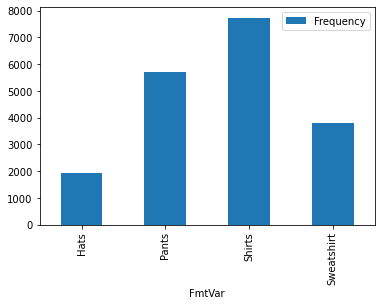

In [74]:
## Plot the SASDataFrame using pandas plot
products.plot(x='FmtVar',y='Frequency', kind='bar')

###  <a id='9b'> 9b. Execute SQL Queries Using FedSQL </a>
[Back to table of contents](#0)

Load the FedSQL action set to execute SQL queries

In [75]:
conn.loadactionset('FedSQL')

NOTE: Added action set 'FedSQL'.


[actionset]

 'FedSQL'

+ Elapsed: 0.0129s, user: 0.0137s, sys: 0.0148s, mem: 1.23mb

In [76]:
prdCAS.head()

,Product,DiscountCode,Return,StoreID,Price,Cost,Quantity
0,Shirts,,,19.0,7.99,1.99,8.0
1,Sweatshirt,,,17.0,10.99,1.99,6.0
2,Shirts,,,20.0,7.99,1.99,9.0
3,Shirts,TENOFF,,15.0,7.99,1.99,8.0
4,Sweatshirt,,,12.0,10.99,1.99,8.0


Use the execDirect action from the FedSQL action set to execute queries.

In [77]:
conn.execDirect("""select Product, 
                          mean(Quantity) as MeanQuantity
                      from casuser.products
                      group by Product""")

,Product,MEANQUANTITY
0,Sweatshirt,7.494756
1,Hats,7.540541
2,Pants,7.490045
3,Shirts,7.478283


###  <a id='9c'> 9c. Summary Action with Group By </a>
[Back to table of contents](#0)

Execute the **summary** action to find the mean **Quantity** of each **Product**. The results are similar to the SQL results from above.
- Add the groupBy sub parameter to group the results by **Product**
- Add the vars sub parameter to select only the **Product** and **Quantity** columns.

In [78]:
prdCAS.groupBy="Product"
prdCAS.vars=["Product","Quantity"]
prdCAS

CASTable('products', caslib='casuser', groupby='Product', vars=['Product', 'Quantity'])

Reference the prdCAS object with the summary action to find the mean **Quantity** of each **Product**. Specify the subSet equals *Mean* to only output the mean.

In [79]:
groups = prdCAS.summary(subSet="Mean")

print(groups.keys())
groups

odict_keys(['ByGroup1.Summary', 'ByGroup2.Summary', 'ByGroup3.Summary', 'ByGroup4.Summary', 'ByGroupInfo'])


,Column,Mean
Product,,
Hats,Quantity,7.540541
,Column,Mean
Product,,
Pants,Quantity,7.490045
,Column,Mean
Product,,
Shirts,Quantity,7.478283
,Column,Mean
Product,,


<div class="alert alert-block alert-success">
    <b>SUMMARY</b>
Notice that executing an action with the groupBy sub parameter returns a table for each distinct groupBy value and a groupBy information table. In this example, the summary action returns 4 group by tables with the mean Quantity of each Product. It also returns the ByGroupInfo table.
</div>


To combine all of the groupBy tables you can use the [concat_bygroups](https://sassoftware.github.io/python-swat/generated/swat.cas.results.CASResults.concat_bygroups.html#swat.cas.results.CASResults.concat_bygroups) method. This returns a single SASDataFrame with similar results to the previous SQL action.

In [80]:
groupTbl = groups.concat_bygroups()
groupTbl

,Column,Mean
Product,,
Hats,Quantity,7.540541
Pants,Quantity,7.490045
Shirts,Quantity,7.478283
Sweatshirt,Quantity,7.494756


###  <a id='9d'> 9d. Execute the SAS DATA Step </a>
[Back to table of contents](#0)

You can execute most of the traditional SAS data step using the [runCode](https://go.documentation.sas.com/doc/en/pgmsascdc/v_015/caspg/cas-datastep-runcode.htm) action. The runCode action returns a information about the input and output tables. 

View the [Restrictions and Supported Language Elements](https://go.documentation.sas.com/doc/en/pgmsascdc/v_015/casdspgm/p1eyivn5kal7qwn1drrdt71v21ml.htm?homeOnFail) for more information.

In [81]:
## View all orders where a discount was applied

conn.runCode("""
        data casuser.discountOrders;
            set casuser.products;
            where DiscountCode is not null;
        run;
""")

[InputCasTables]

                              casLib      Name  Rows  Columns                                           casTable
 0  CASUSER(Peter.Styliadis@sas.com)  products  3877        7  CASTable('products', caslib='CASUSER(Peter.Sty...

[OutputCasTables]

                              casLib            Name  Rows  Columns  Append Promoted                                           casTable
 0  CASUSER(Peter.Styliadis@sas.com)  discountOrders  3877        7     NaN        N  CASTable('discountOrders', caslib='CASUSER(Pet...

+ Elapsed: 0.0919s, user: 0.176s, sys: 0.41s, mem: 170mb

Reference the new CAS table and view the number of rows and columns. And preview the first 5 rows.

In [82]:
discounts = conn.CASTable('discountOrders')

## View the new CAS table
print(discounts.shape)
discounts.head()

(3877, 7)


,Product,DiscountCode,Return,StoreID,Price,Cost,Quantity
0,Shirts,TENOFF,,15.0,7.99,1.99,8.0
1,Pants,TC10,,18.0,8.99,1.49,6.0
2,Hats,EMP50,,19.0,4.99,0.99,9.0
3,Shirts,SPC,,20.0,7.99,1.99,7.0
4,Shirts,TENOFF,,30.0,7.99,1.99,9.0


View the frequecy of discount codes.

In [93]:
(discounts
 .DiscountCode
 .value_counts()
)

TC10          1164
TENOFF         981
SPC            582
BB20           561
EMP50          330
FREEDEAL       212
FMDISCOUNT      47
dtype: int64

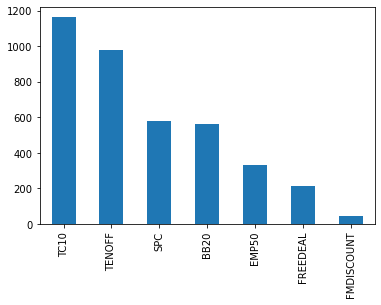

In [92]:
(discounts
 .DiscountCode
 .value_counts()
 .plot(kind = 'bar')
);

###  <a id='9e'> 9e. Create a New CAS Table Using the CopyTable Action </a>
[Back to table of contents](#0)

In [94]:
prdCAS = conn.CASTable('products',caslib="casuser")
prdCAS

CASTable('products', caslib='casuser')

In [95]:
prdCAS.head()

,Product,DiscountCode,Return,StoreID,Price,Cost,Quantity
0,Shirts,,,19.0,7.99,1.99,8.0
1,Sweatshirt,,,17.0,10.99,1.99,6.0
2,Shirts,,,20.0,7.99,1.99,9.0
3,Shirts,TENOFF,,15.0,7.99,1.99,8.0
4,Sweatshirt,,,12.0,10.99,1.99,8.0


Add parametrs to the input CAS table. These parameters will execute and create the new CAS table.

In [96]:
prdCAS.where="DiscountCode is not null"
prdCAS.vars=['Product','DiscountCode','StoreID','TotalPrice']
prdCAS.computedVarsProgram="TotalPrice = Price * Quantity"
prdCAS

CASTable('products', caslib='casuser', computedvarsprogram='TotalPrice = Price * Quantity', vars=['Product', 'DiscountCode', 'StoreID', 'TotalPrice'], where='DiscountCode is not null')

Use the prdCAS object to create a new CAS table.

In [97]:
prdCAS.copytable(casOut={'name':'discountOrders_copyTable',
                         'caslib':'casuser',
                         'promote':True}
                )

## drop table if necessary
# conn.dropTable(name='discountorders_copytable',caslib='casuser')

ERROR: The target table DISCOUNTORDERS_COPYTABLE of the promotion already exists. Please specify a different name.
ERROR: The action stopped due to errors.


+ Elapsed: 0.0596s, user: 0.113s, sys: 0.126s, mem: 600mb

Confirm the table was loaded.

In [98]:
conn.tableInfo(caslib="casuser")

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,PRODUCTS,19200,7,0,utf-8,2023-01-18T12:49:54+00:00,2023-01-18T12:49:54+00:00,2023-01-18T12:53:18+00:00,UTF8,1.989665e+09,1.989665e+09,1.989666e+09,0,0,0,0,products.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-18T12:49:50+00:00,1.989665e+09
1,DISCOUNT_DIM,7,3,0,utf-8,2023-01-18T12:49:55+00:00,2023-01-18T12:49:55+00:00,2023-01-18T12:49:55+00:00,UTF8,1.989665e+09,1.989665e+09,1.989665e+09,0,0,0,0,discount_dim.sashdat,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-18T12:49:51+00:00,1.989665e+09
2,DISCOUNTORDERS,3877,7,0,utf-8,2023-01-18T12:50:31+00:00,2023-01-18T12:50:31+00:00,2023-01-18T12:53:11+00:00,UTF8,1.989665e+09,1.989665e+09,1.989666e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN
3,CARS_UPDATE,428,16,0,utf-8,2023-01-18T00:51:39+00:00,2023-01-18T00:51:46+00:00,2023-01-18T00:51:46+00:00,UTF8,1.989622e+09,1.989622e+09,1.989622e+09,1,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN
4,DISCOUNTORDERS_COPYTABLE,3877,4,0,utf-8,2023-01-18T12:49:32+00:00,2023-01-18T12:49:32+00:00,2023-01-18T12:49:32+00:00,UTF8,1.989665e+09,1.989665e+09,1.989665e+09,1,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN


View the first 5 rows of the new CAS table.

In [99]:
discount = conn.CASTable('discountorders_copytable', caslib="casuser")
discount.head()

,Product,DiscountCode,StoreID,TotalPrice
0,Shirts,TENOFF,15.0,63.92
1,Pants,TC10,18.0,53.94
2,Hats,EMP50,19.0,44.91
3,Shirts,SPC,20.0,55.93
4,Shirts,TENOFF,30.0,71.91


<div class="alert alert-block alert-success">
    <b>SUMMARY</b>
There are hundreds of available CAS actions and SWAT methods. We only touch on a select few. View the documentation for the most up to date information.

</div>


##  <a id='10'> 10. Terminate the Connection to CAS </a>
It's best practice to terminate the connection to CAS when you are done. This clears all session scope CAS tables.

[Back to table of contents](#0)



In [100]:
conn.terminate()

# Summary
In the end, you want to process your big data on the CAS server, then return the summarized data to your client to use native Python packages.

You can also prepare the data on the CAS server using Python, then use those CAS tables in other applications like SAS Visual Analytics and more!

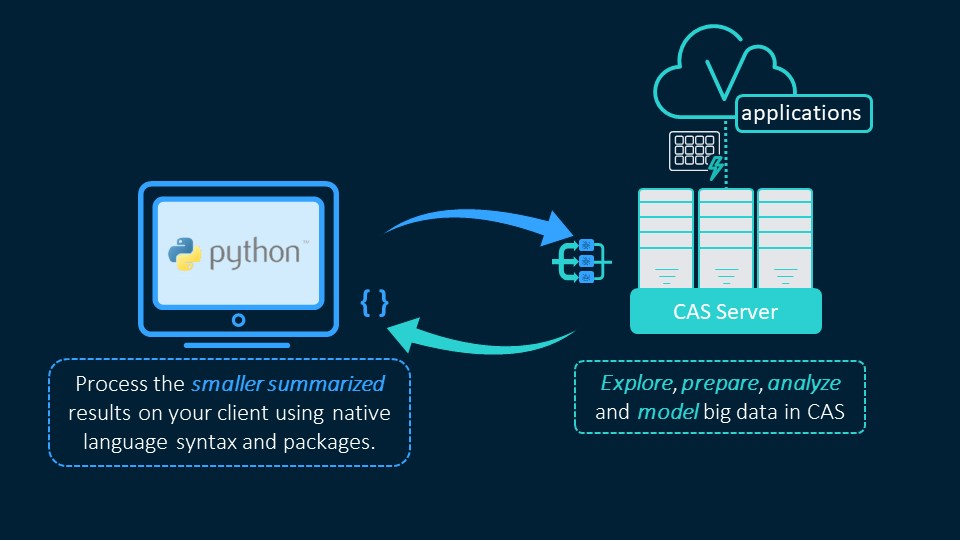

In [101]:
slide(r'\CASConsiderations.jpg', w=1000)

# Thank your for attending!

### Connect with me (*Peter Styliadis*) on [LinkedIn](https://www.linkedin.com/in/peter-styliadis-712bb357") to see any new blogs I create!